In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import project_tests as t
import pickle
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [2]:
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>
### 1.1 On the user-dataset
- The number of the unique `article_id, user_email` and `title` from the user-dataset
- The relationship of the `article_id` has been watched by the number of user (based on their signed `email`)
- Likewise, for the (`article_id`, `email`)

<AxesSubplot:ylabel='title'>

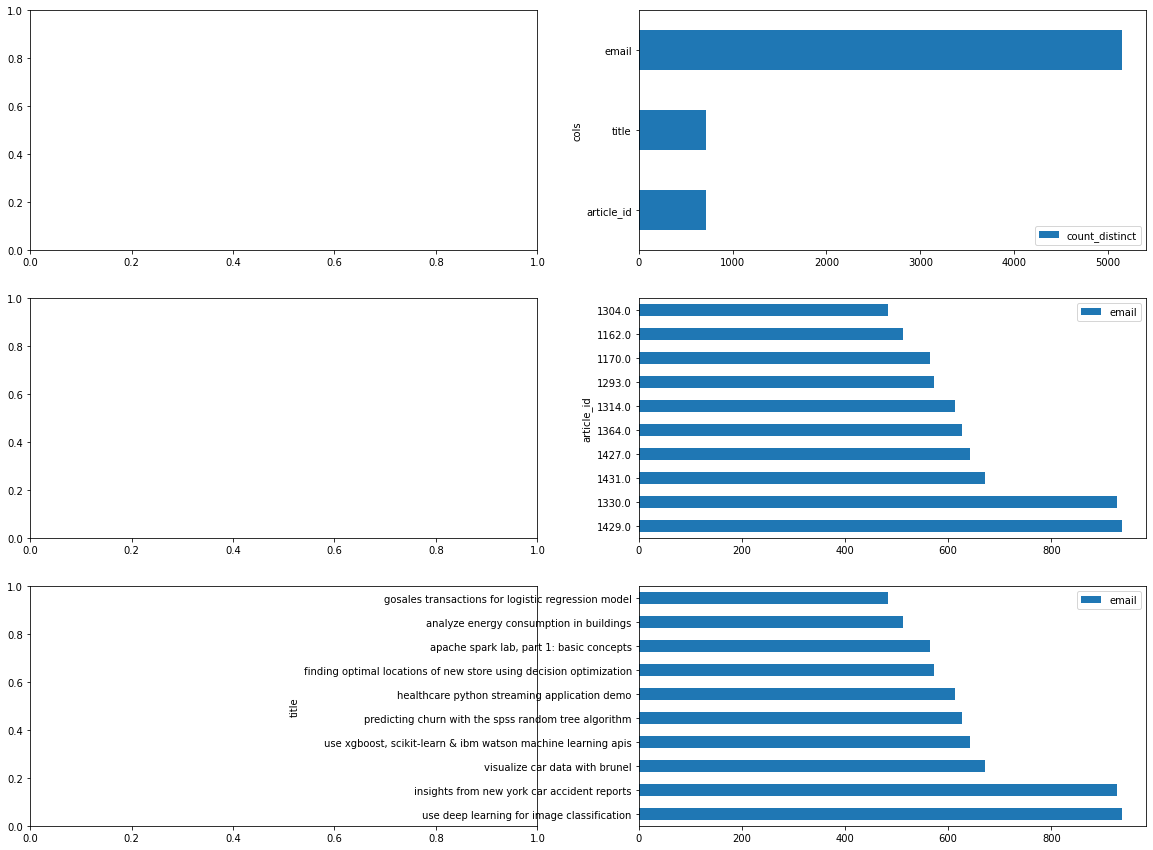

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (20, 15))
ax = ax.ravel()
stats_user_df = pd.DataFrame({'cols': df.columns,
                             'count_distinct': [len(df[col].value_counts()) for col in df.columns]
                            })
df_users_artc = df.groupby('article_id').count()[['email']].sort_values(by='email', ascending=False)
df_users_ttle = df.groupby('title').count()[['email']].sort_values(by='email', ascending=False)

stats_user_df.set_index('cols').plot(kind = 'barh', ax = ax[1])
df_users_artc.head(10).plot(kind='barh', ax = ax[3])
df_users_ttle.head(10).plot(kind='barh', ax = ax[5])


### 2. On the `content` dataset

We have 5 columns in this dataset and we will find out the 

In [16]:
avi_df = pd.read_csv('data/employee_data.csv')
avi_df.drop(columns='reviews').to_csv('fpt_avi_data.csv', index=False)